# Images Pipeline

In [ ]:
%pip install numpy pillow matplotlib tensorflow torch torchvision torchaudio

  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   - -------------------------------------- 10.5/216.1 MB 59.8 MB/s eta 0:00:04
   ---- ----------------------------------- 23.1/216.1 MB 58.5 MB/s eta 0:00:04
   ------ --------------------------------- 32.5/216.1 MB 59.1 MB/s eta 0:00:04
   ------ --------------------------------- 37.2/216.1 MB 45.5 MB/s eta 0:00:04
   --------- ------------------------------ 49.8/216.1 MB 48.8 MB/s eta 0:00:04
   ----------- ---------------------------- 62.9/216.1 MB 50.8 MB/s eta 0:00:04
   -------------- ------------------------- 76.8/216.1 MB 52.7 MB/s eta 0:00:03
   --------------- ------------------------ 83.1/216.1 MB 51.0 MB/s eta 0:00:03
   ---------------- ----------------------- 87.3/216.1 MB 46.4 MB/s eta 0:00:03
   ------------------ -------------------- 101.2/216.1 MB 48.6 MB/s eta 0:00:03
   

## Versión con Tesseract

In [ ]:
%pip install pytesseract 


In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import numpy as np
import pytesseract
from PIL import Image

# Ajusta esta ruta a donde tengas Tesseract en tu máquina, si no la tienes en el PATH:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [2]:
def image_to_text_simple(ruta_imagen: str, idiomas: str = "spa+eng+fra") -> str:
    """
    Abre la imagen con PIL y devuelve el texto reconocido por Tesseract.
    """
    if not os.path.isfile(ruta_imagen):
        raise FileNotFoundError(f"No existe la imagen: {ruta_imagen}")
    img = Image.open(ruta_imagen).convert("RGB")
    texto = pytesseract.image_to_string(img, lang=idiomas)
    return texto


C:\Users\Israel Herrera\AppData\Local\Temp\ipykernel_15420\2347356132.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


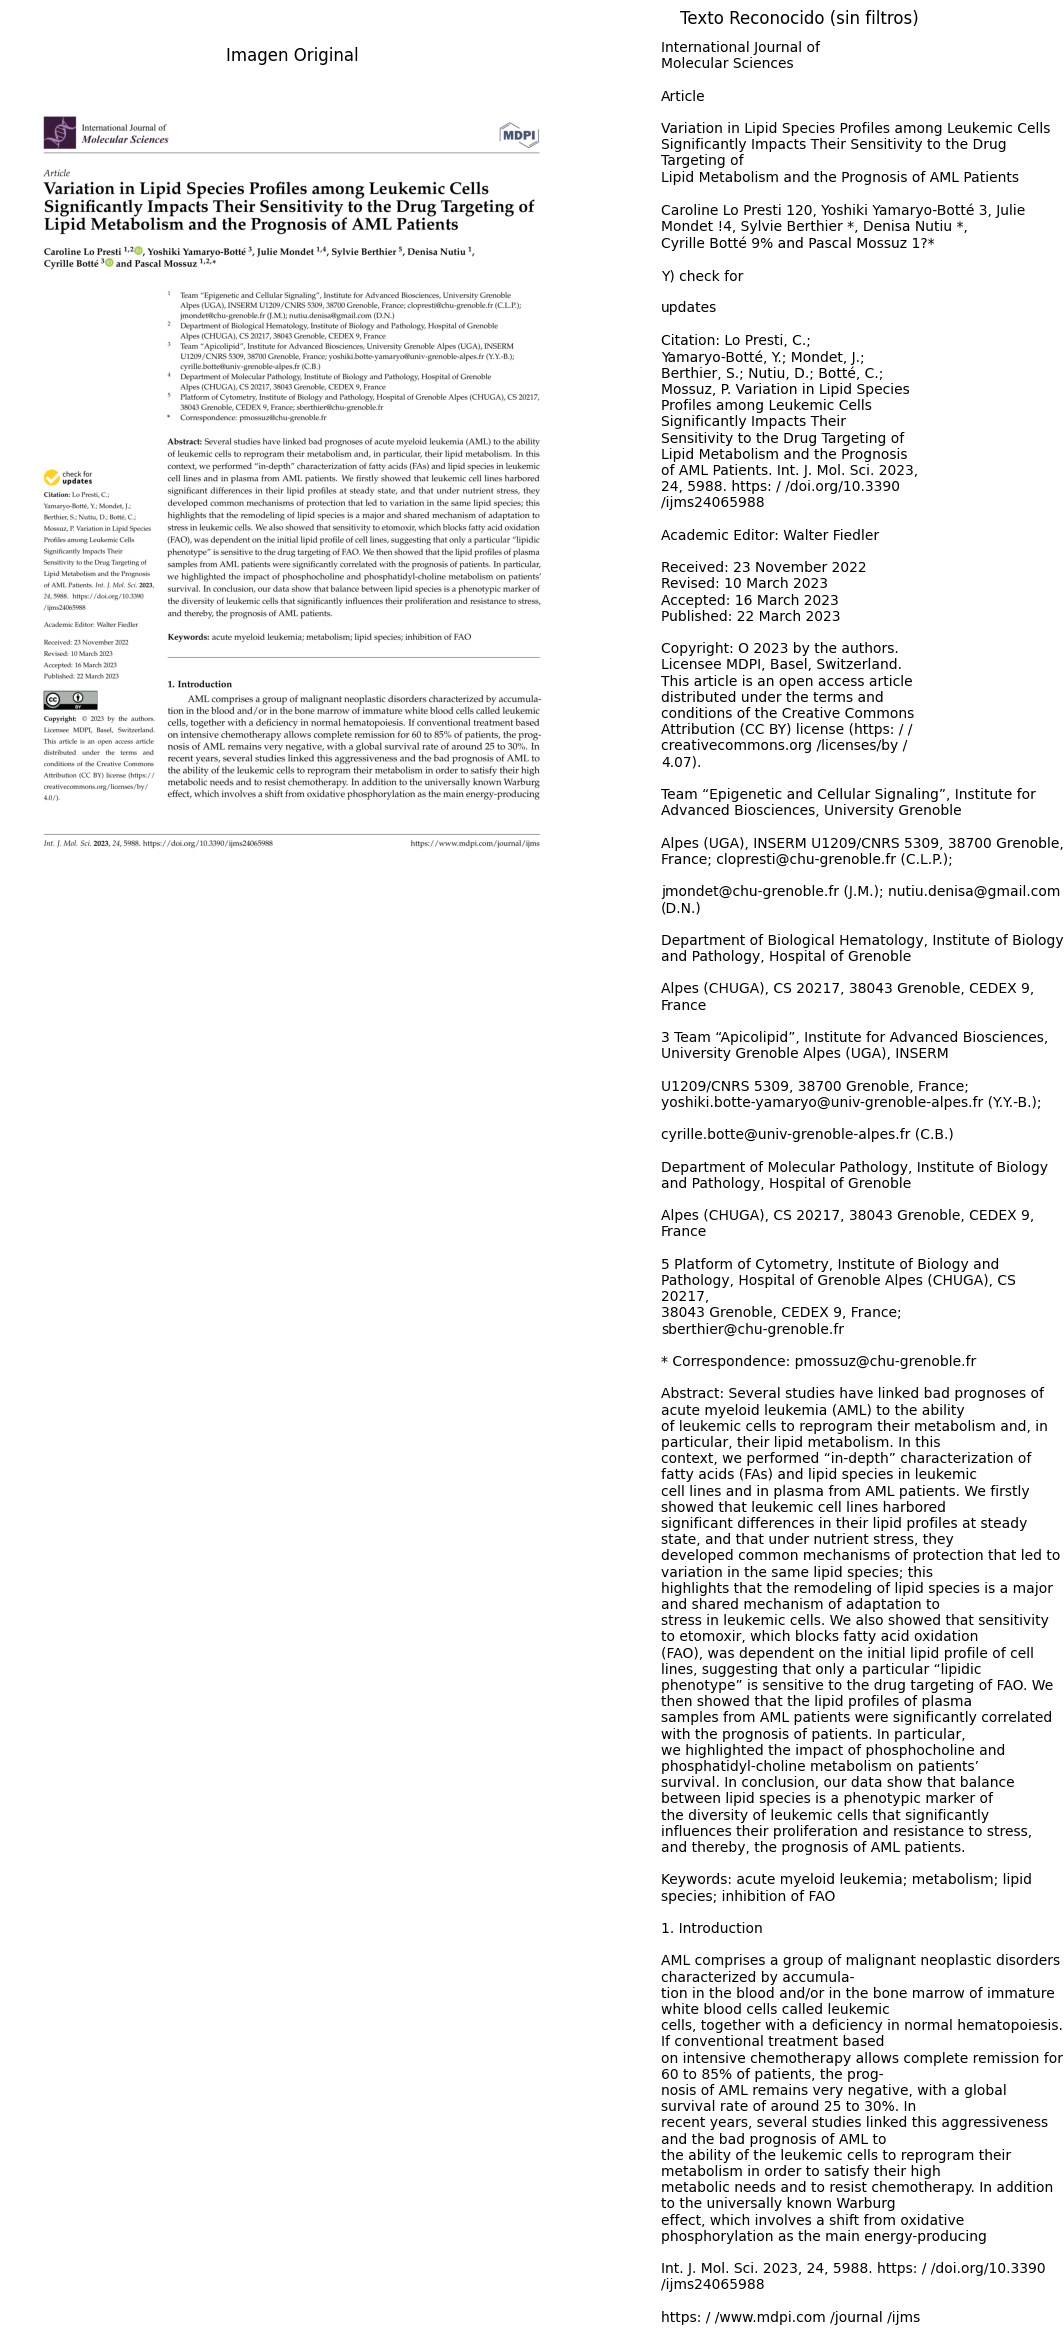


=== Texto extraído (sin preprocesamiento) ===

International Journal of
Molecular Sciences

Article

Variation in Lipid Species Profiles among Leukemic Cells
Significantly Impacts Their Sensitivity to the Drug Targeting of
Lipid Metabolism and the Prognosis of AML Patients

Caroline Lo Presti 120, Yoshiki Yamaryo-Botté 3, Julie Mondet !4, Sylvie Berthier *, Denisa Nutiu *,
Cyrille Botté 9% and Pascal Mossuz 1?*

Y) check for

updates

Citation: Lo Presti, C.;
Yamaryo-Botté, Y.; Mondet, J.;
Berthier, S.; Nutiu, D.; Botté, C.;
Mossuz, P. Variation in Lipid Species
Profiles among Leukemic Cells
Significantly Impacts Their
Sensitivity to the Drug Targeting of
Lipid Metabolism and the Prognosis
of AML Patients. Int. J. Mol. Sci. 2023,
24, 5988. https: / /doi.org/10.3390
/ijms24065988

Academic Editor: Walter Fiedler

Received: 23 November 2022
Revised: 10 March 2023
Accepted: 16 March 2023
Published: 22 March 2023

Copyright: O 2023 by the authors.
Licensee MDPI, Basel, Switzerland.
This a

In [3]:
ruta = "page0_highres.png"

try:
    # 1) Extraer texto
    texto_extraido = image_to_text_simple(ruta, idiomas="spa+eng+fra")

    # 2) Cargar la imagen como numpy array para medir ancho y alto en pixeles
    imagen_original = Image.open(ruta).convert("RGB")
    imagen_np = np.array(imagen_original)
    alto_px, ancho_px, _ = imagen_np.shape

    # 3) Decidimos un figsize base en ancho (en pulgadas)
    #    Por ejemplo, queremos fig_width = 12 pulgadas en total.
    fig_width = 12  # ajusta esto a lo que prefieras  
                     # (por ejemplo, 14, 10, 8, etc.)

    # 4) Si usamos width_ratios=[3,1], entonces el subplot izquierdo 
    #    ocupará 3/4 del ancho total. Calculamos ese ancho en pulgadas:
    ancho_izq_inches = fig_width * (2 / 3)  # 75% de 12" = 9" en este ejemplo

    # 5) Ahora calculamos el alto de la figura de modo que la imagen no quede
    #    con barras blancas arriba/abajo. Si la imagen en pixeles es alto_px x ancho_px,
    #    su aspecto (alto/ancho) es:
    aspecto_imagen = alto_px / ancho_px

    #    Cuando el subplot izquierdo ocupa ancho_izq_inches pulgadas de ancho,
    #    su altura ideal para no deformarse es:
    alto_fig_inches = aspecto_imagen * ancho_izq_inches

    #    De este modo, el subplot izquierdo llenará exactamente todo el alto de la figura
    #    y no quedará espacio en blanco arriba/abajo.
    #    (En nuestro ejemplo: si la imagen original es 1800×1200 px, aspecto=1.5, 
    #     ancho_izq_inches=9 → alto_fig_inches = 1.5 * 9 = 13.5")

    # 6) Creamos la figura con ese tamaño calculado:
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(fig_width, alto_fig_inches),
        gridspec_kw={"width_ratios": [2, 1]},
    )

    # 7) Subplot izquierdo: mostrar la imagen con aspect='equal' (proporción original)
    ax_img = axes[0]
    ax_img.imshow(imagen_np, aspect="equal")
    ax_img.axis("off")
    ax_img.set_title("Imagen Original")
    # Si quieres centrar la imagen en caso de que siga sobrando un pelín de espacio,
    # podrías usar: ax_img.set_anchor("C")

    # 8) Subplot derecho: mostrar el texto extraído
    ax_txt = axes[1]
    ax_txt.axis("off")
    ax_txt.set_title("Texto Reconocido (sin filtros)")
    ax_txt.text(
        0.01, 0.99,
        texto_extraido,
        va="top",
        ha="left",
        wrap=True,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

    # 9) También imprimimos el texto en consola (opcional)
    print("\n=== Texto extraído (sin preprocesamiento) ===\n")
    print(texto_extraido)

except Exception as error:
    print(f"ERROR: {error}")


## Versión con Calamari

In [1]:
%pip install calamari-ocr


Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib inline
import os

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1) IMPORTAMOS LA CLASE Predictor y usamos 'from_checkpoint'
try:
    from calamari_ocr.ocr.predict.predictor import Predictor
except ImportError as e:
    raise ImportError(
        "No se pudo importar 'Predictor' desde calamari_ocr.ocr.predict.predictor.\n"
        "Asegúrate de tener calamari-ocr ≥ 2.0 instalado en este entorno.\n"
        "Puedes revisar la versión con: pip show calamari-ocr"
    ) from e

# ------------------------------------------------------------
# 2) AJUSTA ESTA RUTA al checkpoint (.ckpt) de Calamari que hayas
#    entrenado o descargado. Asegúrate de que la ruta sea correcta
#    y de que el archivo exista en esa ubicación.
# ------------------------------------------------------------
CALAMARI_MODEL_PATH = r"Weights\calamari_models-2.1\uw3-modern-english\0.ckpt.json"

# Verificamos que el .ckpt exista antes de cargar:
# if not os.path.isfile(CALAMARI_MODEL_PATH):
#     raise FileNotFoundError(f"No encuentro el checkpoint en:\n  {CALAMARI_MODEL_PATH}")

# 3) Creamos el predictor a partir del checkpoint (fábrica recommended)
try:
    predictor = Predictor.from_checkpoint(checkpoint=CALAMARI_MODEL_PATH)
except AttributeError as e:
    raise AttributeError(
        "El método 'from_checkpoint' no existe en tu versión de Calamari OCR.\n"
        "En ese caso, verifica que tengas calamari-ocr ≥ 2.0. Si aún no lo tienes, actualiza:"
        "\n\n    pip install --upgrade calamari-ocr\n\n"
        "Si aun así no funciona, revisa la doc oficial o instala la última versión."
    ) from e

def image_to_text_calamari(ruta_imagen: str) -> str:
    """
    Abre la imagen y devuelve el texto reconocido por el modelo Calamari.
    Usa predictor.predict_file para cargar la imagen desde disco.
    """
    if not os.path.isfile(ruta_imagen):
        raise FileNotFoundError(f"No existe la imagen: {ruta_imagen}")

    # `predict_file` devuelve una lista de RecognitionResult; cada uno tiene .prediction
    resultados = predictor.predict_file(ruta_imagen)
    lineas = [res.prediction for res in resultados]
    return "\n".join(lineas)

# ------------------- EJECUCIÓN DEL PIPELINE -------------------
ruta = "page0_highres.png"

try:
    # 1) Extraer texto con Calamari
    texto_extraido = image_to_text_calamari(ruta)

    # 2) Cargar la imagen como numpy array para medir ancho y alto en píxeles
    imagen_original = Image.open(ruta).convert("RGB")
    imagen_np = np.array(imagen_original)
    alto_px, ancho_px, _ = imagen_np.shape

    # 3) Definimos un figsize base en ancho (en pulgadas)
    fig_width = 12
    ancho_izq_inches = fig_width * (2 / 3)

    # 4) Calculamos la altura ideal para mantener el aspecto
    aspecto_imagen = alto_px / ancho_px
    alto_fig_inches = aspecto_imagen * ancho_izq_inches

    # 5) Creamos la figura y dos subplots (imagen vs texto)
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(fig_width, alto_fig_inches),
        gridspec_kw={"width_ratios": [2, 1]},
    )

    # 6) Subplot izquierdo: mostrar la imagen original
    ax_img = axes[0]
    ax_img.imshow(imagen_np, aspect="equal")
    ax_img.axis("off")
    ax_img.set_title("Imagen Original")

    # 7) Subplot derecho: mostrar el texto extraído por Calamari
    ax_txt = axes[1]
    ax_txt.axis("off")
    ax_txt.set_title("Texto Reconocido (Calamari)")
    ax_txt.text(
        0.01, 0.99,
        texto_extraido,
        va="top",
        ha="left",
        wrap=True,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

    # 8) También imprimimos el texto en consola
    print("\n=== Texto extraído (Calamari) ===\n")
    print(texto_extraido)

except Exception as error:
    print(f"ERROR: {error}")


TypeError: Predictor.from_checkpoint() missing 1 required positional argument: 'params'

## Versión con EasyOCR

%pip install easyocr

In [ ]:
%matplotlib inline
import os

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Importar EasyOCR
import easyocr

# Inicializamos el lector con los idiomas deseados. 
# Aquí: 'es' (español), 'en' (inglés) y 'fr' (francés).
reader = easyocr.Reader(["es", "en", "fr"], gpu=False)  # gpu=False fuerza CPU

def image_to_text_easyocr(ruta_imagen: str) -> str:
    """
    Abre la imagen con PIL y devuelve el texto reconocido por EasyOCR.
    """
    if not os.path.isfile(ruta_imagen):
        raise FileNotFoundError(f"No existe la imagen: {ruta_imagen}")
    img = np.array(Image.open(ruta_imagen).convert("RGB"))

    # La función `reader.readtext` devuelve una lista de tripletas: 
    # [ [ [x1,y1], [x2,y2], [x3,y3], [x4,y4] ], texto_detectado, confianza ]
    resultados = reader.readtext(img)
    # Concatenamos todos los textos detectados en orden de lectura.
    lineas = [item[1] for item in resultados]
    texto = "\n".join(lineas)
    return texto

# ------------------- Ejecución del pipeline -------------------

ruta = "page0_highres.png"

try:
    # 1) Extraer texto con EasyOCR
    texto_extraido = image_to_text_easyocr(ruta)

    # 2) Cargar la imagen como numpy array para medir ancho y alto en pixeles
    imagen_original = Image.open(ruta).convert("RGB")
    imagen_np = np.array(imagen_original)
    alto_px, ancho_px, _ = imagen_np.shape

    # 3) Definimos un figsize base en ancho (en pulgadas)
    fig_width = 12

    # 4) Calculamos ancho_izq_inches para el subplot de la imagen (2/3 del total)
    ancho_izq_inches = fig_width * (2 / 3)

    # 5) Altura ideal para mantener el aspecto
    aspecto_imagen = alto_px / ancho_px
    alto_fig_inches = aspecto_imagen * ancho_izq_inches

    # 6) Creamos la figura y dos subplots (imagen y texto)
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(fig_width, alto_fig_inches),
        gridspec_kw={"width_ratios": [2, 1]},
    )

    # 7) Subplot izquierdo: mostrar la imagen original
    ax_img = axes[0]
    ax_img.imshow(imagen_np, aspect="equal")
    ax_img.axis("off")
    ax_img.set_title("Imagen Original")

    # 8) Subplot derecho: mostrar el texto extraído por EasyOCR
    ax_txt = axes[1]
    ax_txt.axis("off")
    ax_txt.set_title("Texto Reconocido (EasyOCR)")
    ax_txt.text(
        0.01, 0.99,
        texto_extraido,
        va="top",
        ha="left",
        wrap=True,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

    # 9) También imprimimos el texto en consola
    print("\n=== Texto extraído (EasyOCR) ===\n")
    print(texto_extraido)

except Exception as error:
    print(f"ERROR: {error}")


## Versión con Kraken OCR

In [ ]:
%pip install kraken

In [ ]:
%matplotlib inline
import os

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Importar Kraken
from kraken import binarization, pageseg
from kraken import rpred

# Ajusta esta ruta a tu checkpoint/modelo Kraken (por ejemplo, "kraken_model.mlmodel")
KRAKEN_MODEL_PATH = r"/ruta/a/tu/kraken_model.mlmodel"

def image_to_text_kraken(ruta_imagen: str) -> str:
    """
    Abre la imagen con PIL, la binariza y segmenta en líneas, 
    luego devuelve el texto reconocido por Kraken.
    """
    if not os.path.isfile(ruta_imagen):
        raise FileNotFoundError(f"No existe la imagen: {ruta_imagen}")
    # Kraken funciona bien con escala de grises
    img = Image.open(ruta_imagen).convert("L")
    img_np = np.array(img)

    # 1) Binarización (NLBin): mejora precisión en Kraken
    bin_img = binarization.nlbin(img_np)

    # 2) Segmentación en líneas
    # pageseg.segment() devuelve una lista de bounding boxes de líneas
    line_bounds = pageseg.segment(bin_img)

    # 3) Para cada línea, obtenemos el fragmento y predecimos
    # rpred.rpred(model, image, bbox=None) permite pasar el ROI
    textos_lineas = []
    for bbox in line_bounds:
        # bbox es (x0, y0, x1, y1)
        x0, y0, x1, y1 = bbox
        line_img = bin_img[y0:y1, x0:x1]
        # Kraken acepta images en formato numpy 2D (binario o escala de grises)
        pred = rpred.rpred(KRAKEN_MODEL_PATH, [line_img])
        # rpred devuelve lista de listas de predicciones para cada línea
        # Accedemos al texto predicho: pred[0][0].text (si hay un único resultado por línea)
        if len(pred) > 0 and len(pred[0]) > 0:
            textos_lineas.append(pred[0][0].text)
    texto = "\n".join(textos_lineas)
    return texto

# ------------------- Ejecución del pipeline -------------------

ruta = "page0_highres.png"

try:
    # 1) Extraer texto con Kraken
    texto_extraido = image_to_text_kraken(ruta)

    # 2) Cargar la imagen como numpy array para medir ancho y alto en pixeles
    imagen_original = Image.open(ruta).convert("RGB")
    imagen_np = np.array(imagen_original)
    alto_px, ancho_px, _ = imagen_np.shape

    # 3) Definimos un figsize base en ancho (en pulgadas)
    fig_width = 12

    # 4) Calculamos ancho_izq_inches para el subplot de la imagen (2/3 del total)
    ancho_izq_inches = fig_width * (2 / 3)

    # 5) Altura ideal para mantener el aspecto
    aspecto_imagen = alto_px / ancho_px
    alto_fig_inches = aspecto_imagen * ancho_izq_inches

    # 6) Creamos la figura y dos subplots (imagen y texto)
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(fig_width, alto_fig_inches),
        gridspec_kw={"width_ratios": [2, 1]},
    )

    # 7) Subplot izquierdo: mostrar la imagen original
    ax_img = axes[0]
    ax_img.imshow(imagen_np, aspect="equal")
    ax_img.axis("off")
    ax_img.set_title("Imagen Original")

    # 8) Subplot derecho: mostrar el texto extraído por Kraken
    ax_txt = axes[1]
    ax_txt.axis("off")
    ax_txt.set_title("Texto Reconocido (Kraken)")
    ax_txt.text(
        0.01, 0.99,
        texto_extraido,
        va="top",
        ha="left",
        wrap=True,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

    # 9) También imprimimos el texto en consola
    print("\n=== Texto extraído (Kraken) ===\n")
    print(texto_extraido)

except Exception as error:
    print(f"ERROR: {error}")


# Docs pipeline

In [ ]:
%pip install pymupdf


In [ ]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import pymupdf       # También conocido como fitz


In [ ]:
def renderizar_pagina_pdf(
    ruta_pdf: str,
    pagina: int = 0,
    dpi_deseados: int = 300,
    salida_png: str = "page0_highres.png"
) -> None:
    """
    Abre un PDF, renderiza la página indicada a la resolución dada (dpi)
    y guarda el resultado como PNG. Además, muestra la imagen resultante en el notebook.

    Parámetros:
    - ruta_pdf (str): Ruta al archivo PDF.
    - pagina (int): Índice de la página a renderizar (0-based). Por defecto, 0.
    - dpi_deseados (int): DPI con el que se desea renderizar. Por defecto, 300.
    - salida_png (str): Nombre (o ruta) del archivo PNG de salida.
    """
    # 1) Verificar que el archivo PDF existe
    if not os.path.isfile(ruta_pdf):
        raise FileNotFoundError(f"No se encontró el PDF en: {ruta_pdf}")

    # 2) Calcular factor de zoom a partir de DPI deseados
    #    PyMuPDF asume que escala 1.0 equivale a 72 dpi, por lo que:
    #    factor = dpi_deseados / 72
    factor = dpi_deseados / 72.0
    matriz = pymupdf.Matrix(factor, factor)

    # 3) Abrir el documento y cargar la página
    doc = pymupdf.open(ruta_pdf)
    try:
        if pagina < 0 or pagina >= doc.page_count:
            raise ValueError(f"Índice de página ({pagina}) fuera de rango. El PDF tiene {doc.page_count} páginas.")
        page = doc.load_page(pagina)

        # 4) Renderizar (pixmap) con la matriz de escalado
        pix = page.get_pixmap(matrix=matriz)

        # 5) Guardar la imagen resultante en disco
        pix.save(salida_png)
    finally:
        # 6) Cerrar el documento para liberar recursos
        doc.close()

    # 7) Mostrar la imagen dentro del notebook usando matplotlib
    if os.path.isfile(salida_png):
        img = plt.imread(salida_png)
        # Ajustar figsize manteniendo la proporción de la imagen
        alto_px, ancho_px, _ = img.shape
        proporción = alto_px / ancho_px
        # Por ejemplo, fijamos ancho de figura a 8 pulgadas
        fig_ancho = 8
        fig_alto = fig_ancho * proporción
        plt.figure(figsize=(fig_ancho, fig_alto))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Página {pagina + 1} renderizada a {dpi_deseados} dpi")
        plt.show()
    else:
        raise RuntimeError(f"No se pudo guardar la imagen en: {salida_png}")


In [ ]:
# Ruta al PDF que quieres procesar
ruta_pdf = r"C:\Users\Israel Herrera\Proyectos\Image2Text\Docs\PMC10054724\ijms-24-05988.pdf"

# Parámetros a ajustar según tus necesidades
pagina_a_renderizar = 0       # Primera página (índice 0)
dpi_objetivo = 300            # Cambia a 72, 150, 300, 600… según necesites
archivo_salida = "page0_highres.png"

try:
    renderizar_pagina_pdf(
        ruta_pdf=ruta_pdf,
        pagina=pagina_a_renderizar,
        dpi_deseados=dpi_objetivo,
        salida_png=archivo_salida
    )
except Exception as e:
    print(f"ERROR al renderizar PDF: {e}")
